<h1 style="text-align:center">Basic System Definition and Simulation</h1>
<h3 style="text-align:center">MCHE474: Control Systems</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In this notebook, we'll take a quick look at some of the core functionality of the [Control System Library](http://python-control.readthedocs.io/en/latest/index.html) in the classical control domain, meaning that we'll be dealing with systems in the Laplace (or "s") domain and working with the transfer functions representing those systems.  We'll first plot the response of a mass-spring-damper system to some initial conditions using the analytical solution. Then, we'll use the Control Systems Library to define the system by its transfer function and use that transfer-function definition to do some basic analysis and simluate the system response to several types of inputs.

## Notebook Imports

We'll start by importing the libraries we'll need to work.  These include [NumPy](http://www.numpy.org), [matplotlib](https://matplotlib.org) for plotting, and the Control Systems Library itself. The code cells here will appear unchanged in most of the notebooks we'll use in *MCHE474*.

We first import `numpy` and give it a "nickname" `np`. In doing so, we can preface calls to all NumPy functions with `np.` rather than having to type `numpy.`. This is a common convention in the use of NumPy. We say that we have imported NumPy into the namespace `np`. I'm oversimplifying a bit, but having different namespaces allows libraries to have functions of the same name, since all calls to the library or module  will include the namespace information.

In [1]:
# Grab all of the NumPy functions with namespace np
import numpy as np              

Next, we'll import matplotlib. This is another cell that will show up unchanges in nearly every Notebook that we do in *MCHE474*. The `%matplotlib inline` command tells the Notebook to include the plots inline with it, rather than plotting them in a seperate window. We import the `matplotlib.pyplot` module into the namepace `plt`. As you'll see, this means that nearly all of our plotting commands are prefixed by `plt.`.

In [2]:
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

Finally we'll import the Control Systems Library. We don't specify a shorthand namespace, so we'll need to preface any commands from it with `control.`.

In [3]:
import control # This will import the control library.  

Now that we've imported the necessary libraries, let's walk through the basic use of them, roughly mirroring Section 2.9 of  [*Modern Control Systems (13th Edition)* by Richard Dorf and Robert Bishop](http://amzn.com/0134407628), the current (as of Fall 2017) textbook for *MCHE474*.

## Defining and Plotting a Time Response
We'll start by looking at the system in Figure 1. It's a simple mass-spring-damper system, with mass $m$ connected to ground through a spring $k$ and damper $c$. There is also a input force, $f$, acting on the mass.

<p style="text-align:center">
	<img src="http://crawlab.org/shared/MassSpringDamper_DirectForce_Horiz.png" alt="Example Mass-spring-damper System" width=50%><br>
    <strong>Figure 1: Example Mass-spring-damper System</strong>
</p>

The equation of  motion of this system is:

$ \quad m \ddot{x} + c \dot{x} + kx = f $

If we define $\omega_n$ to be the system's *natural frequency* and $\zeta$ as the system's *damping ratio*, we can rewrite this equation as:

$ \quad \ddot{x} + \frac{c}{m} \dot{x} + \frac{k}{m}x = \frac{f}{m} $

Then,

$ \quad \ddot{x} + 2\zeta\omega_n \dot{x} + \omega_n^2 x = \frac{f}{m} $

where

$ \quad \omega_n = \sqrt{\frac{k}{m}} $

and 

$ \quad 2\zeta\omega_n = \frac{c}{m} $

If we manually solve this differential equation, we find the solution to an initial displacement of the mass $x(0)$ to be:

$ \quad x(t) = \frac{x(0)}{\sqrt{1 - \zeta^2}} e^{-\zeta \omega_n t} \sin{\left(\omega_d t + \theta\right)} $

where

$ \quad \omega_d = \omega_n \sqrt{1 - \zeta^2} $ is the *damped natural frequency* and $\theta = \cos^{-1}{\zeta}$.

Let's evaluate this function directly and plot the response. Then, we'll look at how we'll be able to get system reponses directly using the Control Systems Library without having to explicitly/analytically solve the differential equations.

We'll first define the system parameters, picking the initial condition, natural frequency and damping ratio to match the one used in the book:

$\quad x(0) = 0.15$ m

$\quad \omega_n = \sqrt{2} $ rad/s

and

$ \quad \zeta = \frac{1}{2\sqrt{2}} $.

In [4]:
x0 = 0.15    # The initial condition (m)

# Define the natural frequency. We use the numpy sqrt function, so we need to preface its call with np.
w_n = np.sqrt(2)    

# Define the damping ratio. 
zeta = 1 / (2 * np.sqrt(2))

# We'll also define the mass of the system
m = 1.0     # mass (kg)

We'll next need to define an array that specifies the time range over which we wish to plot the function. We'll use the Numpy `linspace` function to do so. 

For any  well documented library, within the Jupyter Notebook, you can get information and help with a function by following its name with a `?`. For example, if we would like help on the  Numpy `linspace` function, we can issue the command

    np.linspace?
   
in a Notebook cell. Let's try that out below.

In [5]:
np.linspace?

Running that cell with open a sub-window that has the help information for the function.

Now, let's use it to set up the time array. We want to plot the response from 0 to 10 seconds. We'll specify 1001 points within that range. From the documentation, we see that the format of the call to `linspace` should be:

    np.linspace(start, end, number_of_points)

We'll assign the returned array to the variable `t`.

In [6]:
t = np.linspace(0, 10, 1001) # define a time vector of 1001 equally-spaced points between 0 and 10

Now, we just need to compute the response given the equations above. NumPy makes this easy, as its operations work on arrays. This means that we can pass the time array directly, rather than having to use some type of loop over it. We'll first calculate the damped natural frequency, $\omega_d$, and phase shift of the response, $\theta$. Then, we'll use those to form the full expression.

In [7]:
w_d = w_n * np.sqrt(1 - zeta**2)  # Damped ratural freq (rad/s)
theta = np.arccos(zeta)           # Phase shift (rad)

x = (x0 / np.sqrt(1 - zeta**2)) * np.exp(-zeta * w_n * t) * np.sin(w_d * t + theta)

Now, we can plot the response, $x$, as a function of time. We'll first use the default settings.

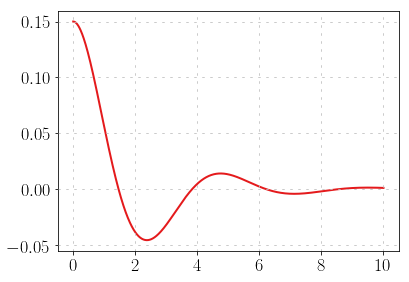

In [8]:
plt.plot(t, x)

That's obviously not a nicely formatted plot. It's missing axis labels, *etc.* Let's improve it a bit. Let's also define and plot the decay envelopes for this resposne. They are formed by the 

$ \quad  \frac{x(0)}{\sqrt{1 - \zeta^2}} e^{-\zeta \omega_n t} $ 

component of the response equation.

In [9]:
upper_decay_env = (x0 / np.sqrt(1 - zeta**2)) * np.exp(-zeta * w_n * t)
lower_decay_env = -upper_decay_env # It's just the opposite

Now, we'll plot these along with the response while adjusting the plot formatting. Note that many of these changes could be made to your default profile (which would stop you from having to copy them  all every time you plot) by modifying your `.matplotlibrc` file as outlined [here](https://matplotlib.org/users/customizing.html). If you like, you can take a look at [my defaults](https://github.com/DocVaughan/CRAWLAB-Code-Snippets/blob/master/Plotting/matplotlib%20plot%20styles/matplotlibrc).

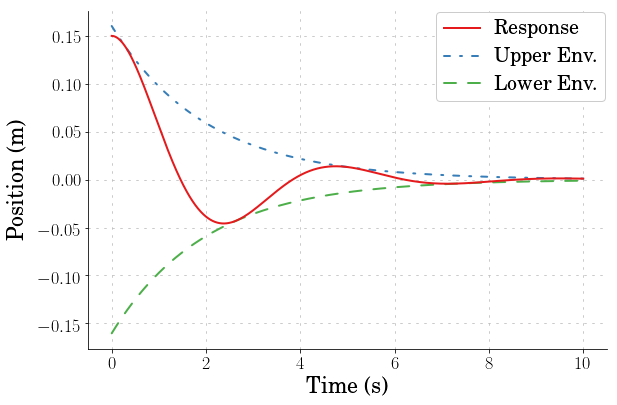

In [10]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

# Remove the top and right axis borders
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, x, linewidth=2, linestyle='-', label=r'Response')

# Now add the decay envolopes with a low zorder to push them behind the response
plt.plot(t, upper_decay_env, linewidth=2, linestyle='-.', zorder=1, label=r'Upper Env.')
plt.plot(t, lower_decay_env, linewidth=2, linestyle='--', zorder=1, label=r'Lower Env.')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_mass_spring_damper_response.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## Working with Transfer Functions

When working in the  Laplace (or "s") domain will be modeling our systems using their transfer functions. The Control Systems Library has numerous tools to help us define, analyze, and simulate our system in this domain. Let's explore those now.

### Defining Transfer Functions
To define a transfer function, we need to provide its numerator and denominator to the  `tf()` function of the library. To do so, we'll define the numerator and denominator at 1D arrays, where the power of `s` is indicated by the postition of the constant in the array.

The mass-spring-damper system we looked at above is:

$ \quad G(s) = \frac{X(s)}{F(s)} = \frac{1}{ms^2 + cs + k} $

Like the time-domain solution, we can also write this transfer function in terms of the natural frquency, $\omega_n$, and damping ratio, $\zeta$, of the system:

$ \quad G(s) = \frac{X(s)}{F(s)} = \frac{1/m}{s^2 + 2\zeta\omega_n s + \omega_n^2} $

Let's use this second form.  For the parameters we selected above, it is:

$ \quad G(s) = \frac{X(s)}{F(s)} = \frac{1}{s^2 + s + 1} $

We'll first define an array, which we'll call `num` that contains the numerator value. Since it only has one value, the command will be of the form:

    num = [1 / m]

To define the denominator, we need to create an array where the element represents the power of `s` for the constant there. In this case:

    den = [1, 2 * zeta * w_n, w_n**2]

To check this, work from the "right" side of the definition. `w_n**2` is $\omega_n^2$, which is mulitplied by $s^0$. The next element is `2 * zeta * w_n`, which is the $2\zeta\omega_n$ term and given its position in the first indexed element of the array is multiplied by $s^1$. This continues for all similar definitions.

***Note:*** This is one difference between Python and MATLAB. In Python, the commas are always needed between elements. In MATLAB, they are (sometimes) optional.

In [11]:
# Define the numerator and denominator of the transfer function
num = [1 / m]
den = [1, 2 * zeta * w_n, w_n**2]

Now, that these are defined, we can pass them to the `tf` function of the library. Remember that since `tf` is a function in the `control` module, we need to use `control.tf()` to call it. We'll assign the variable `sys` to hold transfer function returned. 

In [12]:
# Define the transfer function form of the system defined by num and den
sys = control.tf(num, den)

We can check that the transfer function is defined correctly by printing `sys`.

In [13]:
print(sys)


     1
-----------
s^2 + s + 2



### Analysis of the System
Now that the system's transfer function is defined, we can use many of the analysis tools in the library. We can calculate the poles by

In [14]:
sys.pole()

array([-0.5+1.32287566j, -0.5-1.32287566j])

and the zeros by 

In [15]:
sys.zero()

array([], dtype=float64)

which, as we should expect returns an empty array indicating that there are no zeros for this transfer function.

We can plot a (not so pretty) pole-zero map by:

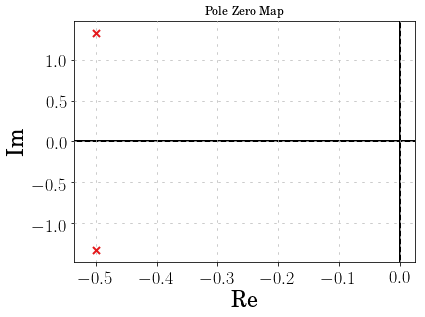

In [16]:
poles, zeros = control.pzmap.pzmap(sys)

There are [many others](http://python-control.readthedocs.io/en/latest/control.html#control-system-analysis) that we'll learn about in later notebooks. We can also simulate system responses using the transfer function directly, allowing us to avoid analytically solving the system ODEs.

### Simluation Using the Transfer Function
The library has [functions defined](http://python-control.readthedocs.io/en/latest/control.html#time-domain-simulation) that allow us to *very* easily simulate system responses to initial conditions, impulses, and step inputs. We also, with just a little bit more work, simulate the response to arbitrary inputs of our choosing.

#### Responses to Initial Conditions
The function to simulate a response to initial conditions is:

    control.initial_response()

We have to pass the system to it and have the option to pass several other parameters, including the time array and the initial condition itself. The initial condition has to include *all* of the states of the system, so we need to define a array to hold them by:

    sys_init = [0, 0.15]

The function returns a time array and the output(s) of the system.

You can get more information [here](http://python-control.readthedocs.io/en/latest/generated/control.initial_response.html#control.initial_response).

For our system, the call to this function is:

In [17]:
# Define the initial conditions for the system.
# Here they are the initial velocity and position of the mass
sys_init = [0, 0.15]      

time_out, response = control.initial_response(sys, t, sys_init)

In this call, we store the output (the response itself) in the array named `response` and the time vector returned by the function in array `time_out`. We now can plot this reponse using those two arrays. It should match the response that we plotted above using the analytical solution.

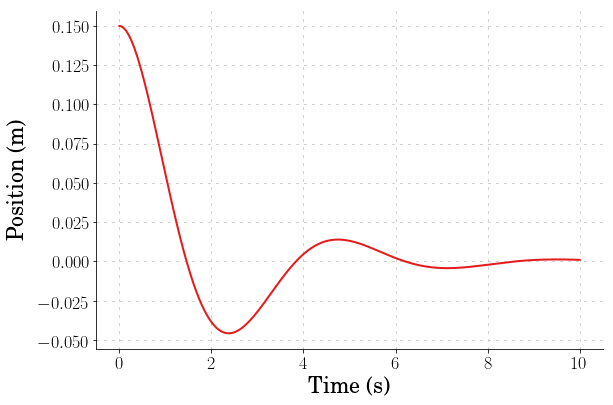

In [18]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_out, response, linewidth=2, linestyle='-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_initial_response.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

### Impulse Response
We can also plot the response of the system to an impulse. The function to do so is 

    control.impulse_response()
    
which has a similar form to the one we used for the initial condition response above. For this system, the call is:

In [19]:
time_imp, impulse_response = control.impulse_response(sys, t)

As before, we can now plot this response using the arrays returned by the function.

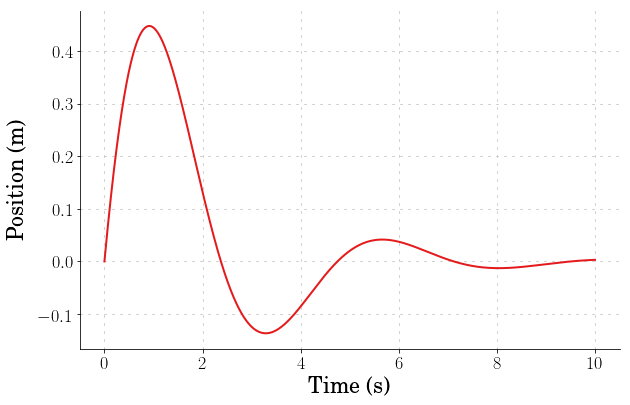

In [20]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_imp, impulse_response, linewidth=2, linestyle='-', label=r'Response')


# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_impulse_response.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

#### Step Response
The function to simluate the system response to a step input follows the same patterns as the initial condition and impulse response functions. As you might expect, it is:

    control.step_response()

where we have to pass the system and have the option of passing other information. More information on it can be found [here](http://python-control.readthedocs.io/en/latest/generated/control.step_response.html#control.step_response).

For the mass-spring-damper system, let's simulate a step response with zero initial conditions (*i.e.* The system is at rest when the input is applied.)

To do this, we issue the command:

In [21]:
time_step, step_response = control.step_response(sys, t)

As before, we can now plot this reponse using the arrays returned.

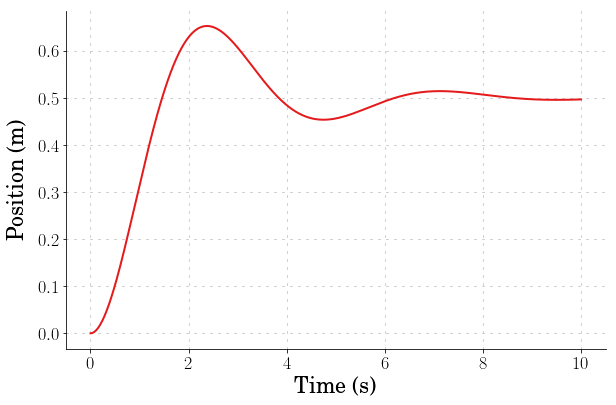

In [22]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(time_step, step_response, linewidth=2, linestyle='-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_step_response.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

#### Forced Response
The function to simluated a forced response looks similar, but is just *slightly* more complex since we have to propoerly define the input ourselves. We'll investigate its use in more detail in another Notebook.

<hr>


#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [23]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())